# Baseline Results for Binary Classification (pain vs. no pain)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras import Model

import sys
module_path = os.path.abspath(os.getcwd() + '\\..')
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.load_dataset import load_dataset, load_fusioned_dataset
from src.lib.DeepStack.deepstack.base import KerasMember
from src.lib.DeepStack.deepstack.ensemble import DirichletEnsemble

In [2]:
epochs, batch_size = 50, 32
kf = KFold(n_splits=3, shuffle=True, random_state=48)

results = []

early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
    )

In [3]:
class Baseline():
    def __init__(self, n_features, n_length, n_outputs):
        input = Input(shape=(n_length, n_features))
        lstm = LSTM(50)(input)
        dense = Dense(50)(lstm)
        output = Dense(units=n_outputs, activation='sigmoid')(dense)
        model = Model(inputs=input, outputs=output)
        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=n_outputs, average='macro')])
        self.model = model

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=2)
        return history

    def evaluate(self, X_test, y_test):
        results = self.model.evaluate(X_test, y_test, verbose=0)
        return results

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return predictions

    def summary(self):
        self.model.summary()

## 1. Unimodal Body Modality (Skeleton)

### Dataset

In [4]:
X_train, X_test, y_train, y_test = load_dataset('skeleton', binary=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[1], X_train.shape[-1], y_train.shape[1]

(783, 350, 35) (783, 1)
(274, 350, 35) (274, 1)


In [5]:
model = Baseline(n_features, n_length, n_outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 35)]         0         
                                                                 
 lstm (LSTM)                 (None, 50)                17200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 19,801
Trainable params: 19,801
Non-trainable params: 0
_________________________________________________________________


### Baseline LSTM model

Epoch 1/50
17/17 - 4s - loss: 0.7019 - accuracy: 0.4655 - auc_1: 0.4811 - precision_1: 0.4402 - recall_1: 0.3622 - f1_score: 0.6546 - val_loss: 0.7036 - val_accuracy: 0.4828 - val_auc_1: 0.4891 - val_precision_1: 0.4554 - val_recall_1: 0.3651 - val_f1_score: 0.6512 - 4s/epoch - 237ms/step
Epoch 2/50
17/17 - 1s - loss: 0.6917 - accuracy: 0.5057 - auc_1: 0.5339 - precision_1: 0.4859 - recall_1: 0.2717 - f1_score: 0.6546 - val_loss: 0.6953 - val_accuracy: 0.4751 - val_auc_1: 0.5097 - val_precision_1: 0.4321 - val_recall_1: 0.2778 - val_f1_score: 0.6512 - 1s/epoch - 79ms/step
Epoch 3/50
17/17 - 1s - loss: 0.6876 - accuracy: 0.5326 - auc_1: 0.5628 - precision_1: 0.5309 - recall_1: 0.3386 - f1_score: 0.6546 - val_loss: 0.6937 - val_accuracy: 0.4981 - val_auc_1: 0.5160 - val_precision_1: 0.4742 - val_recall_1: 0.3651 - val_f1_score: 0.6512 - 1s/epoch - 81ms/step
Epoch 4/50
17/17 - 1s - loss: 0.6860 - accuracy: 0.5307 - auc_1: 0.5803 - precision_1: 0.5333 - recall_1: 0.2835 - f1_score: 0.6546 

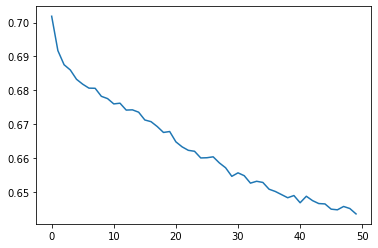

Epoch 1/50
17/17 - 4s - loss: 0.7458 - accuracy: 0.4655 - auc_2: 0.4369 - precision_2: 0.4570 - recall_2: 0.8382 - f1_score: 0.6317 - val_loss: 0.7129 - val_accuracy: 0.4559 - val_auc_2: 0.4514 - val_precision_2: 0.4907 - val_recall_2: 0.5683 - val_f1_score: 0.6950 - 4s/epoch - 214ms/step
Epoch 2/50
17/17 - 1s - loss: 0.7127 - accuracy: 0.4483 - auc_2: 0.4775 - precision_2: 0.4254 - recall_2: 0.5560 - f1_score: 0.6317 - val_loss: 0.7072 - val_accuracy: 0.4636 - val_auc_2: 0.4827 - val_precision_2: 0.4961 - val_recall_2: 0.4532 - val_f1_score: 0.6950 - 1s/epoch - 79ms/step
Epoch 3/50
17/17 - 1s - loss: 0.7027 - accuracy: 0.4885 - auc_2: 0.4780 - precision_2: 0.4387 - recall_2: 0.3859 - f1_score: 0.6317 - val_loss: 0.7127 - val_accuracy: 0.5134 - val_auc_2: 0.4784 - val_precision_2: 0.5714 - val_recall_2: 0.3453 - val_f1_score: 0.6950 - 1s/epoch - 79ms/step
Epoch 4/50
17/17 - 1s - loss: 0.6952 - accuracy: 0.5096 - auc_2: 0.5069 - precision_2: 0.4634 - recall_2: 0.3942 - f1_score: 0.6317 

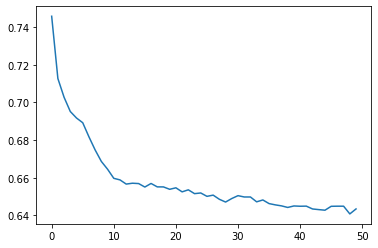

Epoch 1/50
17/17 - 3s - loss: 0.7158 - accuracy: 0.4732 - auc_3: 0.4790 - precision_3: 0.4561 - recall_3: 0.1962 - f1_score: 0.6734 - val_loss: 0.6952 - val_accuracy: 0.5211 - val_auc_3: 0.5259 - val_precision_3: 0.4479 - val_recall_3: 0.3739 - val_f1_score: 0.6117 - 3s/epoch - 203ms/step
Epoch 2/50
17/17 - 1s - loss: 0.6992 - accuracy: 0.5019 - auc_3: 0.5047 - precision_3: 0.5114 - recall_3: 0.4226 - f1_score: 0.6734 - val_loss: 0.6976 - val_accuracy: 0.5556 - val_auc_3: 0.5334 - val_precision_3: 0.4962 - val_recall_3: 0.5652 - val_f1_score: 0.6117 - 1s/epoch - 80ms/step
Epoch 3/50
17/17 - 1s - loss: 0.6962 - accuracy: 0.5000 - auc_3: 0.5125 - precision_3: 0.5068 - recall_3: 0.5585 - f1_score: 0.6734 - val_loss: 0.7016 - val_accuracy: 0.5211 - val_auc_3: 0.5272 - val_precision_3: 0.4688 - val_recall_3: 0.6522 - val_f1_score: 0.6117 - 1s/epoch - 80ms/step
Epoch 4/50
17/17 - 1s - loss: 0.6928 - accuracy: 0.5153 - auc_3: 0.5290 - precision_3: 0.5188 - recall_3: 0.6264 - f1_score: 0.6734 

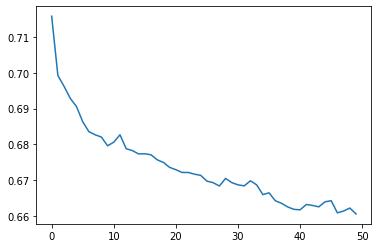

In [6]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    baseline_body_model = Baseline(n_features, n_length, n_outputs)
    history = baseline_body_model.train(X_train, y_train, X_val, y_val, epochs, batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Predictions on the holdout set

In [7]:
y_pred = baseline_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = baseline_body_model.evaluate(X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 58.39% 
ROC/AUC: 0.64 
Precision: 0.90 
Recall: 0.58 
F1 score: 0.92


## 2. Unimodal Face Modality (Action Units + Head Pose)

### Dataset

In [8]:
X_train, X_test, y_train, y_test = load_dataset('AUs', binary=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[1], X_train.shape[-1], y_train.shape[1]

(752, 350, 25) (752, 1)
(268, 350, 25) (268, 1)


In [9]:
model = Baseline(n_features, n_length, n_outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 350, 25)]         0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                15200     
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________


### Baseline LSTM model

Epoch 1/50
16/16 - 4s - loss: 0.6912 - accuracy: 0.5230 - auc_5: 0.5499 - precision_5: 0.5385 - recall_5: 0.0868 - f1_score: 0.6514 - val_loss: 0.6992 - val_accuracy: 0.4861 - val_auc_5: 0.4986 - val_precision_5: 0.4390 - val_recall_5: 0.1452 - val_f1_score: 0.6613 - 4s/epoch - 228ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6859 - accuracy: 0.4910 - auc_5: 0.5743 - precision_5: 0.4085 - recall_5: 0.1198 - f1_score: 0.6514 - val_loss: 0.6953 - val_accuracy: 0.5299 - val_auc_5: 0.5265 - val_precision_5: 0.5300 - val_recall_5: 0.4274 - val_f1_score: 0.6613 - 1s/epoch - 78ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6818 - accuracy: 0.5729 - auc_5: 0.5870 - precision_5: 0.5769 - recall_5: 0.4339 - f1_score: 0.6514 - val_loss: 0.6917 - val_accuracy: 0.5299 - val_auc_5: 0.5444 - val_precision_5: 0.5278 - val_recall_5: 0.4597 - val_f1_score: 0.6613 - 1s/epoch - 79ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6777 - accuracy: 0.5868 - auc_5: 0.6035 - precision_5: 0.5916 - recall_5: 0.4669 - f1_score: 0.6514 

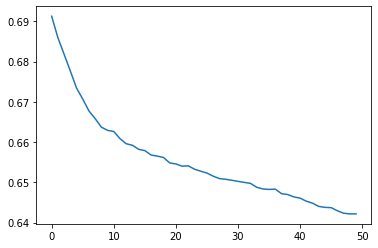

Epoch 1/50
16/16 - 3s - loss: 0.7025 - accuracy: 0.5230 - auc_6: 0.5188 - precision_6: 0.5833 - recall_6: 0.0576 - f1_score: 0.6532 - val_loss: 0.6985 - val_accuracy: 0.5378 - val_auc_6: 0.5488 - val_precision_6: 0.7059 - val_recall_6: 0.0976 - val_f1_score: 0.6578 - 3s/epoch - 207ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6922 - accuracy: 0.5509 - auc_6: 0.5525 - precision_6: 0.6500 - recall_6: 0.1605 - f1_score: 0.6532 - val_loss: 0.6901 - val_accuracy: 0.5538 - val_auc_6: 0.5817 - val_precision_6: 0.6571 - val_recall_6: 0.1870 - val_f1_score: 0.6578 - 1s/epoch - 79ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6899 - accuracy: 0.5489 - auc_6: 0.5473 - precision_6: 0.6000 - recall_6: 0.2099 - f1_score: 0.6532 - val_loss: 0.6879 - val_accuracy: 0.5657 - val_auc_6: 0.5720 - val_precision_6: 0.6591 - val_recall_6: 0.2358 - val_f1_score: 0.6578 - 1s/epoch - 79ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6861 - accuracy: 0.5729 - auc_6: 0.5627 - precision_6: 0.6495 - recall_6: 0.2593 - f1_score: 0.6532 

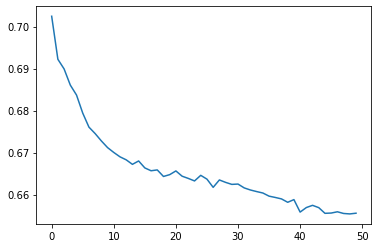

Epoch 1/50
16/16 - 3s - loss: 0.7334 - accuracy: 0.4920 - auc_7: 0.3877 - precision_7: 0.4920 - recall_7: 1.0000 - f1_score: 0.6595 - val_loss: 0.7264 - val_accuracy: 0.4760 - val_auc_7: 0.3938 - val_precision_7: 0.4760 - val_recall_7: 1.0000 - val_f1_score: 0.6450 - 3s/epoch - 209ms/step
Epoch 2/50
16/16 - 1s - loss: 0.7191 - accuracy: 0.4920 - auc_7: 0.3753 - precision_7: 0.4920 - recall_7: 1.0000 - f1_score: 0.6595 - val_loss: 0.7132 - val_accuracy: 0.4760 - val_auc_7: 0.3950 - val_precision_7: 0.4760 - val_recall_7: 1.0000 - val_f1_score: 0.6450 - 1s/epoch - 79ms/step
Epoch 3/50
16/16 - 1s - loss: 0.7098 - accuracy: 0.4880 - auc_7: 0.4206 - precision_7: 0.4898 - recall_7: 0.9757 - f1_score: 0.6595 - val_loss: 0.7064 - val_accuracy: 0.4560 - val_auc_7: 0.4080 - val_precision_7: 0.4641 - val_recall_7: 0.9244 - val_f1_score: 0.6450 - 1s/epoch - 78ms/step
Epoch 4/50
16/16 - 1s - loss: 0.7059 - accuracy: 0.4402 - auc_7: 0.4019 - precision_7: 0.4517 - recall_7: 0.6437 - f1_score: 0.6595 

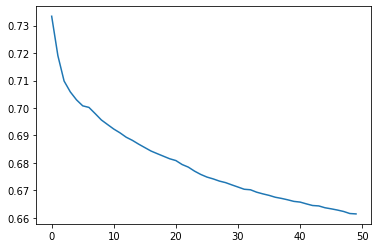

In [10]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    baseline_face_model = Baseline(n_features, n_length, n_outputs)
    history = baseline_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Prediction on the holdout set

In [11]:
y_pred = baseline_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = baseline_face_model.evaluate(X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 57.46% 
ROC/AUC: 0.64 
Precision: 0.92 
Recall: 0.55 
F1 score: 0.93


## 3. Multimodal Early Fusion

### Dataset

In [12]:
X_train, X_test, y_train, y_test = load_fusioned_dataset(binary=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[1], X_train.shape[-1], y_train.shape[1]

(752, 350, 60) (752, 1)
(268, 350, 60) (268, 1)


In [13]:
model = Baseline(n_features, n_length, n_outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 350, 60)]         0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                22200     
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________


### CNN + Bidirectional LSTM

Epoch 1/50
16/16 - 4s - loss: 0.7148 - accuracy: 0.4910 - auc_9: 0.5757 - precision_9: 0.4868 - recall_9: 0.9917 - f1_score: 0.6514 - val_loss: 0.6933 - val_accuracy: 0.4900 - val_auc_9: 0.6376 - val_precision_9: 0.4919 - val_recall_9: 0.9758 - val_f1_score: 0.6613 - 4s/epoch - 233ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6944 - accuracy: 0.4890 - auc_9: 0.6015 - precision_9: 0.4854 - recall_9: 0.9628 - f1_score: 0.6514 - val_loss: 0.6807 - val_accuracy: 0.4940 - val_auc_9: 0.6523 - val_precision_9: 0.4937 - val_recall_9: 0.9435 - val_f1_score: 0.6613 - 1s/epoch - 81ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6839 - accuracy: 0.4810 - auc_9: 0.6054 - precision_9: 0.4802 - recall_9: 0.9008 - f1_score: 0.6514 - val_loss: 0.6725 - val_accuracy: 0.5339 - val_auc_9: 0.6643 - val_precision_9: 0.5163 - val_recall_9: 0.8952 - val_f1_score: 0.6613 - 1s/epoch - 81ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6762 - accuracy: 0.5589 - auc_9: 0.6292 - precision_9: 0.5329 - recall_9: 0.7025 - f1_score: 0.6514 

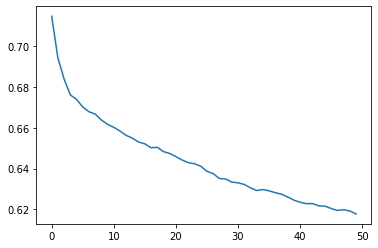

Epoch 1/50
16/16 - 3s - loss: 0.7344 - accuracy: 0.5130 - auc_10: 0.4707 - precision_10: 0.4949 - recall_10: 0.2016 - f1_score: 0.6532 - val_loss: 0.6982 - val_accuracy: 0.4980 - val_auc_10: 0.5027 - val_precision_10: 0.4754 - val_recall_10: 0.2358 - val_f1_score: 0.6578 - 3s/epoch - 210ms/step
Epoch 2/50
16/16 - 1s - loss: 0.7108 - accuracy: 0.5409 - auc_10: 0.5225 - precision_10: 0.5619 - recall_10: 0.2428 - f1_score: 0.6532 - val_loss: 0.6954 - val_accuracy: 0.5020 - val_auc_10: 0.4890 - val_precision_10: 0.4833 - val_recall_10: 0.2358 - val_f1_score: 0.6578 - 1s/epoch - 80ms/step
Epoch 3/50
16/16 - 1s - loss: 0.7019 - accuracy: 0.5549 - auc_10: 0.5333 - precision_10: 0.5877 - recall_10: 0.2757 - f1_score: 0.6532 - val_loss: 0.6947 - val_accuracy: 0.5219 - val_auc_10: 0.5041 - val_precision_10: 0.5246 - val_recall_10: 0.2602 - val_f1_score: 0.6578 - 1s/epoch - 80ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6957 - accuracy: 0.5549 - auc_10: 0.5418 - precision_10: 0.5847 - recall_10: 0.284

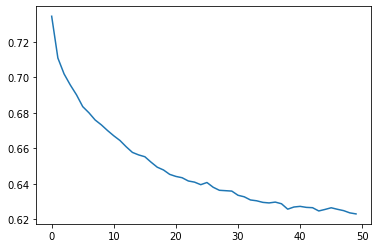

Epoch 1/50
16/16 - 3s - loss: 0.6847 - accuracy: 0.5359 - auc_11: 0.5854 - precision_11: 0.5368 - recall_11: 0.4130 - f1_score: 0.6595 - val_loss: 0.6870 - val_accuracy: 0.5640 - val_auc_11: 0.5842 - val_precision_11: 0.5610 - val_recall_11: 0.3866 - val_f1_score: 0.6450 - 3s/epoch - 212ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6804 - accuracy: 0.5598 - auc_11: 0.6148 - precision_11: 0.5739 - recall_11: 0.4089 - f1_score: 0.6595 - val_loss: 0.6862 - val_accuracy: 0.5880 - val_auc_11: 0.5958 - val_precision_11: 0.6081 - val_recall_11: 0.3782 - val_f1_score: 0.6450 - 1s/epoch - 80ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6775 - accuracy: 0.5876 - auc_11: 0.6302 - precision_11: 0.6190 - recall_11: 0.4211 - f1_score: 0.6595 - val_loss: 0.6809 - val_accuracy: 0.5760 - val_auc_11: 0.6142 - val_precision_11: 0.5844 - val_recall_11: 0.3782 - val_f1_score: 0.6450 - 1s/epoch - 82ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6756 - accuracy: 0.6016 - auc_11: 0.6391 - precision_11: 0.6328 - recall_11: 0.453

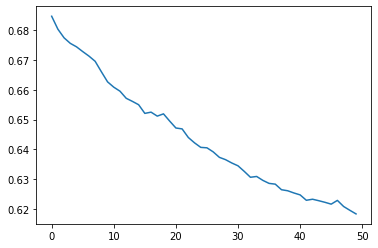

In [14]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    baseline_early_model = Baseline(n_features, n_length, n_outputs)
    history = baseline_early_model.train(X_train, y_train, X_val, y_val, epochs, batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Prediction on the holdout set

In [15]:
y_pred = baseline_early_model.predict(X_test)
_, acc, auc, precision, recall, f1 = baseline_early_model.evaluate(X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 63.06% 
ROC/AUC: 0.70 
Precision: 0.93 
Recall: 0.61 
F1 score: 0.93


## 4. Multimodal Late Fusion

### Dataset

In [16]:
body_X_train, body_X_test, body_y_train, body_y_test = load_dataset('skeleton', binary=True, fusion=True)
body_X_train = body_X_train.reshape(body_X_train.shape[0], body_X_train.shape[2], body_X_train.shape[3])
body_X_test = body_X_test.reshape(body_X_test.shape[0], body_X_test.shape[2], body_X_test.shape[3])
body_X = body_X_train.copy()
body_y = body_y_train.copy()

print(body_X_train.shape, body_y_train.shape)
print(body_X_test.shape, body_y_test.shape)

(752, 350, 35) (752, 1)
(268, 350, 35) (268, 1)


In [17]:
face_X_train, face_X_test, face_y_train, face_y_test = load_dataset('AUs', binary=True)
face_X_train = face_X_train.reshape(face_X_train.shape[0], face_X_train.shape[2], face_X_train.shape[3])
face_X_test = face_X_test.reshape(face_X_test.shape[0], face_X_test.shape[2], face_X_test.shape[3])
face_X = face_X_train.copy()
face_y = face_y_train.copy()

print(face_X_train.shape, face_y_train.shape)
print(face_X_test.shape, face_y_test.shape)

(752, 350, 25) (752, 1)
(268, 350, 25) (268, 1)


In [18]:
n_length, body_features, face_features, n_outputs = face_X_train.shape[1], body_X_train.shape[-1], face_X_train.shape[-1], body_y_train.shape[1]

### Baseline Model

In [42]:
class fusioned_Baseline():
    def __init__(self, body_features, face_features, n_length, n_outputs):
        input_1 = Input(shape=(n_length, body_features))
        lstm_1 = LSTM(50)(input_1)
        dense_1 = Dense(50)(lstm_1)

        input_2 = Input(shape=(n_length, face_features))
        lstm_2 = LSTM(50)(input_2)
        dense_2 = Dense(50)(lstm_2)

        concat = Concatenate()([dense_1, dense_2])
        output = Dense(units=n_outputs, activation='sigmoid')(concat)
        model = Model(inputs=[input_1, input_2], outputs=[output])
        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=n_outputs, average='macro')])
        self.model = model

    def train(self, body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs, batch_size):
        history = self.model.fit([body_X_train, face_X_train], y_train, validation_data=([body_X_val, face_X_val], y_val), 
                            epochs=epochs, batch_size=batch_size, verbose=2)
        return history

    def evaluate(self, body_X_test, face_X_test, y_test):
        results = self.model.evaluate([body_X_test, face_X_test], y_test, verbose=0)
        return results

    def predict(self, body_X_test, face_X_test):
        predictions = self.model.predict([body_X_test, face_X_test])
        return predictions

    def summary(self):
        self.model.summary()

In [43]:
model = fusioned_Baseline(body_features, face_features, n_length, n_outputs)
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_22 (InputLayer)          [(None, 350, 35)]    0           []                               
                                                                                                  
 input_23 (InputLayer)          [(None, 350, 25)]    0           []                               
                                                                                                  
 lstm_21 (LSTM)                 (None, 50)           17200       ['input_22[0][0]']               
                                                                                                  
 lstm_22 (LSTM)                 (None, 50)           15200       ['input_23[0][0]']               
                                                                                           

### Baseline Model

Epoch 1/50
16/16 - 5s - loss: 0.7120 - accuracy: 0.4591 - auc_12: 0.4187 - precision_12: 0.4052 - recall_12: 0.2562 - f1_score: 0.6514 - val_loss: 0.6989 - val_accuracy: 0.5100 - val_auc_12: 0.4909 - val_precision_12: 0.5077 - val_recall_12: 0.2661 - val_f1_score: 0.6613 - 5s/epoch - 290ms/step
Epoch 2/50
16/16 - 2s - loss: 0.7036 - accuracy: 0.4870 - auc_12: 0.4735 - precision_12: 0.4370 - recall_12: 0.2149 - f1_score: 0.6514 - val_loss: 0.6980 - val_accuracy: 0.5179 - val_auc_12: 0.5079 - val_precision_12: 0.5231 - val_recall_12: 0.2742 - val_f1_score: 0.6613 - 2s/epoch - 99ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6966 - accuracy: 0.5170 - auc_12: 0.5139 - precision_12: 0.5000 - recall_12: 0.2231 - f1_score: 0.6514 - val_loss: 0.6920 - val_accuracy: 0.5060 - val_auc_12: 0.5545 - val_precision_12: 0.5000 - val_recall_12: 0.2258 - val_f1_score: 0.6613 - 2s/epoch - 99ms/step
Epoch 4/50
16/16 - 2s - loss: 0.6895 - accuracy: 0.5489 - auc_12: 0.5558 - precision_12: 0.5769 - recall_12: 0.247

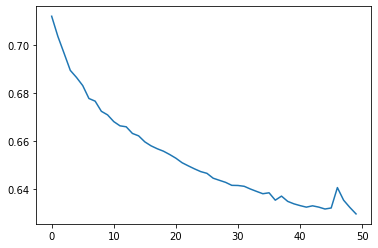

Epoch 1/50
16/16 - 6s - loss: 0.7051 - accuracy: 0.5090 - auc_13: 0.5644 - precision_13: 0.4964 - recall_13: 0.8519 - f1_score: 0.6532 - val_loss: 0.7014 - val_accuracy: 0.5219 - val_auc_13: 0.5363 - val_precision_13: 0.5089 - val_recall_13: 0.6992 - val_f1_score: 0.6578 - 6s/epoch - 363ms/step
Epoch 2/50
16/16 - 2s - loss: 0.6855 - accuracy: 0.5788 - auc_13: 0.5969 - precision_13: 0.5500 - recall_13: 0.7243 - f1_score: 0.6532 - val_loss: 0.6905 - val_accuracy: 0.5857 - val_auc_13: 0.5806 - val_precision_13: 0.5772 - val_recall_13: 0.5772 - val_f1_score: 0.6578 - 2s/epoch - 105ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6754 - accuracy: 0.6208 - auc_13: 0.6309 - precision_13: 0.6073 - recall_13: 0.6173 - f1_score: 0.6532 - val_loss: 0.6886 - val_accuracy: 0.5737 - val_auc_13: 0.5924 - val_precision_13: 0.5769 - val_recall_13: 0.4878 - val_f1_score: 0.6578 - 2s/epoch - 103ms/step
Epoch 4/50
16/16 - 2s - loss: 0.6731 - accuracy: 0.6028 - auc_13: 0.6294 - precision_13: 0.5909 - recall_13: 0.5

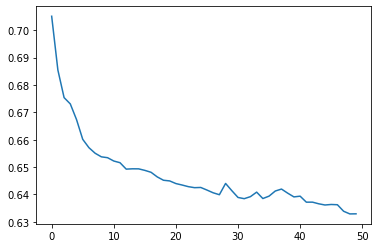

Epoch 1/50
16/16 - 6s - loss: 0.7124 - accuracy: 0.4940 - auc_14: 0.4134 - precision_14: 0.4222 - recall_14: 0.0769 - f1_score: 0.6595 - val_loss: 0.7017 - val_accuracy: 0.4960 - val_auc_14: 0.4554 - val_precision_14: 0.3939 - val_recall_14: 0.1092 - val_f1_score: 0.6450 - 6s/epoch - 357ms/step
Epoch 2/50
16/16 - 2s - loss: 0.7025 - accuracy: 0.4681 - auc_14: 0.4497 - precision_14: 0.4194 - recall_14: 0.2105 - f1_score: 0.6595 - val_loss: 0.6992 - val_accuracy: 0.5160 - val_auc_14: 0.4651 - val_precision_14: 0.4894 - val_recall_14: 0.3866 - val_f1_score: 0.6450 - 2s/epoch - 107ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6952 - accuracy: 0.5120 - auc_14: 0.4977 - precision_14: 0.5054 - recall_14: 0.3806 - f1_score: 0.6595 - val_loss: 0.6952 - val_accuracy: 0.5120 - val_auc_14: 0.4868 - val_precision_14: 0.4819 - val_recall_14: 0.3361 - val_f1_score: 0.6450 - 2s/epoch - 106ms/step
Epoch 4/50
16/16 - 2s - loss: 0.6912 - accuracy: 0.5259 - auc_14: 0.5329 - precision_14: 0.5306 - recall_14: 0.3

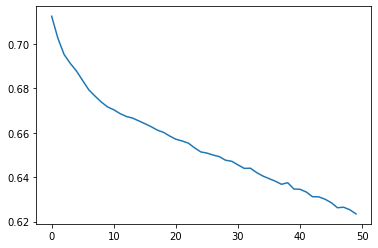

In [20]:
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    body_y_train, body_y_val = body_y[train_index], body_y[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    face_y_train, face_y_val = face_y[train_index], face_y[val_index]
    model = fusioned_Baseline(body_features, face_features, n_length, n_outputs)
    history = model.train(body_X_train, face_X_train, body_y_train, body_X_val, face_X_val, face_y_val, epochs, batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Prediction on the holdout set

In [21]:
y_pred = model.predict(body_X_test, face_X_test)
_, acc, auc, precision, recall, f1 = model.evaluate(body_X_test, face_X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 54.10% 
ROC/AUC: 0.66 
Precision: 0.92 
Recall: 0.52 
F1 score: 0.93


### Ensemble

In [22]:
baseline_body_member = KerasMember(name="Body Model", keras_model=baseline_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
baseline_face_member = KerasMember(name="Face Model", keras_model=baseline_face_model, train_batches=(face_X_train, face_y_train), val_batches=(face_X_test, face_y_test))

In [23]:
dirichletEnsemble = DirichletEnsemble()
dirichletEnsemble.add_member(baseline_body_member)
dirichletEnsemble.add_member(baseline_face_member)
dirichletEnsemble.fit()

In [24]:
e = dirichletEnsemble.describe()
results.append(round(e, 2))

Body Model (weight: 0.4127)
Face Model (weight: 0.5873)
Accuracy: 100.00% - ROC/AUC: 0.65 - Precision: 1.00 - Recall: 1.00 - F1 score: 1.00


## Results

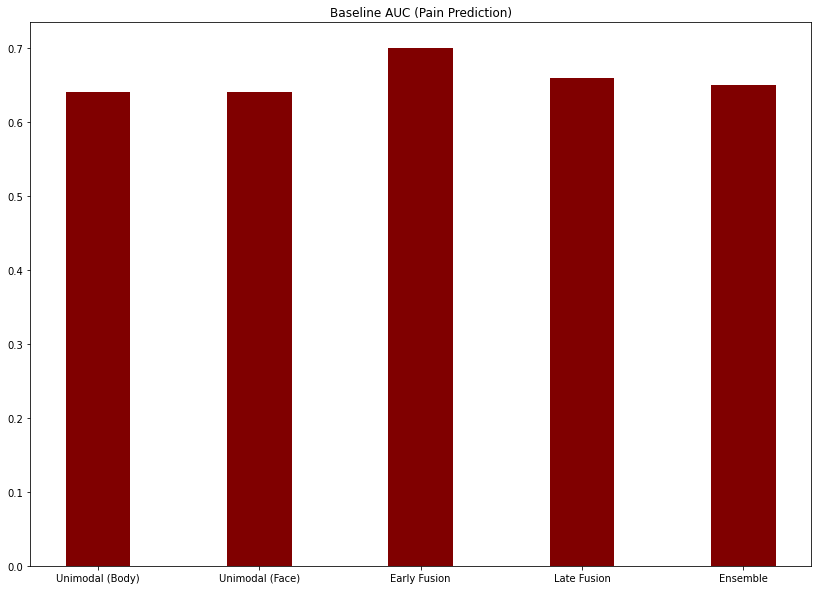

In [39]:
data = {'Unimodal (Body)':results[0], 'Unimodal (Face)':results[1], 'Early Fusion':results[2],
        'Late Fusion':results[3], 'Ensemble':results[4]}
models = list(data.keys())
performance = list(data.values())
  
fig = plt.figure(figsize = (14, 10))
 
plt.bar(models, performance, color ='maroon',
        width = 0.4)
 
plt.title("Baseline AUC (Pain Prediction)")
plt.show()